# Mašinsko učenje - prva nedelja


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Radićemo sa NHANES (National Health and Nutrition Examination Survey) bazom podataka, koja prati zdravstveno stanje dece
i odraslih u slačajnom uzorku izvučenom iz populacije SAD.

In [2]:
df = pd.read_csv("nhanes_2015_2016.csv")

In [4]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


DMDEDUC2 je varijabla koja opisuje stpen obrazovanja ispitanika. 
.value_counts() metod vraća pandas series objekat koji kao index label ima različite vrednosti promenljive, dok sama serija predstavlja frekvencu pojavljivanja pojedinačnih vrednosti.

In [5]:
df.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [9]:
print(df.DMDEDUC2.value_counts().sum())
print(1621 + 1366 + 1186 + 655 + 643 + 3) 
print(df.shape)

5474
5474
(5735, 28)


In [13]:
pd.isnull(df.DMDEDUC2).sum()

261

In [18]:
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
df.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

Rekodiranje varijable o polu:

In [15]:
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})

Relativna frekvencija:

In [17]:
x = df.DMDEDUC2x.value_counts()  
x / x.sum()

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64

Nedostajuće podatke možemo da popunimo .fillna metodom:

In [22]:
df["DMDEDUC2x"] = df.DMDEDUC2x.fillna("Missing")
x = df.DMDEDUC2x.value_counts()
x / x.sum()

Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: DMDEDUC2x, dtype: float64

Nedostajuće vrednosti možemo i da uklonimo .dropna() metodom. Dalje, describe() metoda daje osnovne statističke
karakteristike promenljive:                                                                             

In [23]:
df.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

Prethodnu komandu možemo i da prođemo ručno, zahtev po zahtev:

In [25]:
x = df.BMXWT.dropna()  
print(x.mean()) 
print(np.mean(x)) 

print(x.median())
print(np.percentile(x, 50))  
print(np.percentile(x, 75)) 
print(x.quantile(0.75)) 

81.34267560889509
81.34267560889509
78.2
78.2
92.7
92.7


Sledeće što analiziramo su frekvencije za merenje sistolnog krvnog pritiska (BPXSY1). "BPX" je prefiks za merenja krvnog pritiska u NHANES-u, "SY" označava sistolni krvni pritisak (pritiskanje krvi pri vrhuncu srčanog ciklusa), a "1" ukazuje da je ovo prvo od tri merenja sistolnog krvnog pritiska kod ispitanika.

Osoba se obično smatra predhipertenzivnom kada joj je sistolni krvni pritisak između 120 i 139, ili dijastolni krvni pritisak između 80 i 89. Razmatrajući samo uslov za sistolni pritisak, možemo izračunati udeo NHANES uzorka koji bi se smatrao predhipertenzivnim.

In [26]:
np.mean((df.BPXSY1 >= 120) & (df.BPXSY2 <= 139))

0.3741935483870968

Dalje računamo procenat ljudi u uzorku koji su predhipertezivnom stanju po dijastolnom krvnom pritisku:

In [27]:
np.mean((df.BPXDI1 >= 80) & (df.BPXDI2 <= 89))

0.14803836094158676

In [29]:
a = (df.BPXSY1 >= 120) & (df.BPXSY2 <= 139)
b = (df.BPXDI1 >= 80) & (df.BPXDI2 <= 89)
print(np.mean(a | b))

0.43975588491717527



Merenja krvnog pritiska utiču na pojavu fenomena nazvanog "anksioznost belog mantila", pri kojem može doći do blagog povećanja krvnog pritiska ako ispitanik oseća nervozu prilikom interakcije sa zdravstvenim radnicima. Ovaj efekat obično jenjava ako se krvni pritisak meri nekoliko puta uzastopno. U NHANES-u se i sistolni i dijastolni krvni pritisak mere tri puta za svakog ispitanika (npr. BPXSY2 je drugo merenje sistolnog krvnog pritiska). Možemo izračunati stepen prisustva anksioznosti belog mantila u NHANES podacima posmatrajući srednju razliku između prvih dva merenja sistolnog ili dijastolnog krvnog pritiska.

In [32]:
print(np.mean(df.BPXSY1 - df.BPXSY2))
print(np.mean(df.BPXDI1 - df.BPXDI2))

0.6749860309182343
0.3490407897187558


## Grafički pregledi
Kvantitativne varijable mogu se efikasno sumirati grafički. U nastavku vidimo distribuciju telesne mase (u kilogramima), prikazanu kao histogram.

<AxesSubplot:xlabel='BMXWT', ylabel='Count'>

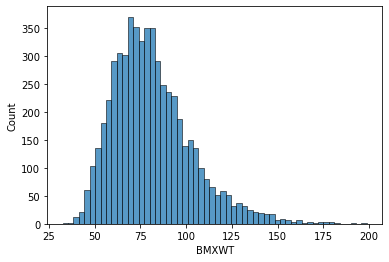

In [31]:
sns.histplot(df.BMXWT.dropna())

## Stratifikacija
Jedan od najefikasnijih načina da se dobiju dodatne informacije iz skupa podataka jeste da ga podelimo na manje, uniformne podskupove i analiziramo svaki od ovih "slojeva" zasebno. Zatim možemo formalno ili neformalno uporediti nalaze u različitim slojevima. Kada radimo sa ljudskim ispitanicima, veoma je uobičajeno stratifikovati podaci prema demografskim faktorima kao što su uzrast, pol i rasa.

Da bismo ilustrovali ovu tehniku, razmotrimo krvni pritisak, vrednost koja obično raste s godinama. Kako bismo videli ovaj trend u NHANES podacima, možemo podeliti podatke u starosne strate i konstruisati boksove (boxplots) sa bočne strane distribucije sistolnog krvnog pritiska (SBP) unutar svake strate. Pošto je uzrast kvantitativna varijabla, moramo kreirati seriju "korpi" sa sličnim vrednostima SBP kako bismo stratifikovali podatke. Svaka kutija na slici predstavlja rezime univarijantnih podataka unutar određene populacione strate (ovde definisane prema uzrastu).

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY1'>

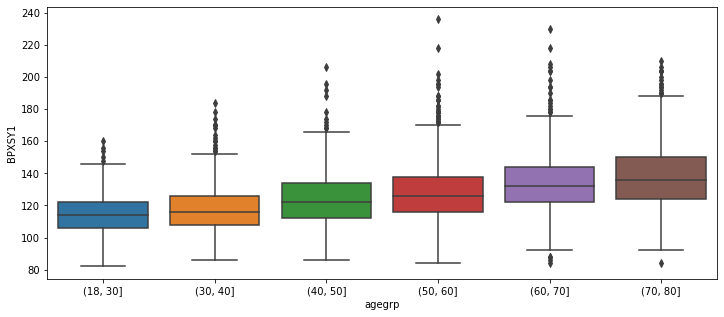

In [35]:
df["agegrp"] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.boxplot(x="agegrp", y="BPXSY1", data=df)

Takođe je slučaj da se krvni pritisak obično razlikuje između žena i muškaraca. Iako bismo jednostavno mogli napraviti dva boksa poredjane jedan pored drugog da bismo ilustrovali ovu razliku, bilo bi pomalo čudno zanemariti uzrast nakon što već utvrdimo da je snažno povezan sa krvnim pritiskom. Stoga ćemo podatke stratifikovati dvostruko, prema polu i uzrastu.

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY1'>

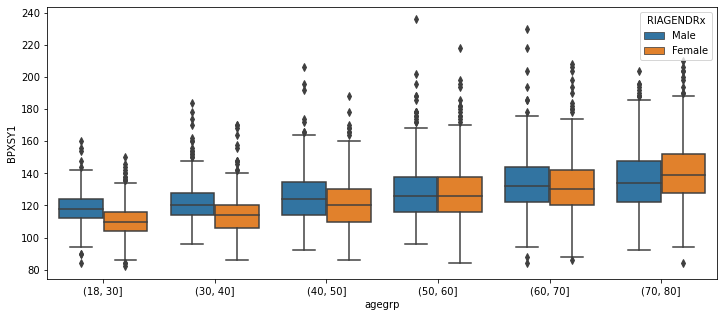

In [37]:
df["agegrp"] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="agegrp", y="BPXSY1", hue="RIAGENDRx", data=df)

Kada se vrši stratifikacija po dva faktora (u ovom slučaju uzrast i pol), možemo prvo grupisati boksove prema uzrastu, a zatim unutar svake starosne grupe prema polu, kao što je gore opisano, ili možemo uraditi obrnuto - prvo grupisati prema polu, a zatim unutar svake grupe prema starosnim grupama. Svaki pristup ističe različit aspekt podataka.

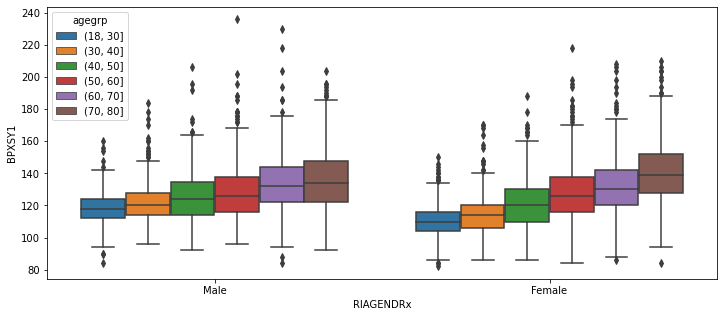

In [44]:
df["agegrp"] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y="BPXSY1", hue="agegrp", data=df)


Stratifikacija može biti korisna i prilikom radu sa kategoričkim varijablama. U nastavku posmatramo distribuciju obrazovnog postignuća ("DMDEDUC2") unutar starosnih grupa od 10 godina. Iako je "neki koledž" najčešći odgovor u svim starosnim grupama, do oko 60. godine drugi najčešći odgovor je "koledž" (tj. osoba je završila koledž sa diplomom od četiri godine). Međutim, kod ljudi starijih od 50 godina, ima podjednako ili više ljudi sa samo srednjom školom ili diplomom o opštem ekvivalentu (HS/GED) nego što ima diplomiranih sa koledža.

Napomena o uzročnosti : Ovde smo videli razlike i u krvnom pritisku i u obrazovnom postignuću na osnovu uzrasta. Moguće je da starenje direktno uzrokuje povećanje krvnog pritiska. Ali u slučaju obrazovnog postignuća, to je zapravo "efekat kohorte rođenja". NHANES je presečno istraživanje (svi podaci za jedan talas prikupljeni su u jednom trenutku). Ljudi koji su, recimo, imali 65 godina 2015. godine (kada su prikupljeni ovi podaci), bili su u godinama koledža oko 1970. godine, dok su ljudi koji su bili u dvadesetim godinama 2015. godine bili u godinama koledža oko 2010. ili kasnije. Tokom poslednjih nekoliko decenija, postalo je mnogo uobičajenije da ljudi bar započnu koledž nego što je to bilo ranije. Stoga, mlađi ljudi kao grupa imaju više obrazovnih postignuća od starijih ljudi kao grupe. Kako ovi mladi ljudi stare, presečni odnos između uzrasta i obrazovnog postignuća će se promeniti.

In [39]:
df.groupby("agegrp")["DMDEDUC2x"].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          College

Možemo takođe vršiti zajedničku stratifikaciju prema uzrastu i polu kako bismo istražili kako se obrazovno postignuće menja istovremeno prema oba ova faktora. Prilikom ovoga, rezultate je lakše interpretirati ako preokrenemo nivoe obrazovanja u kolone i normalizujemo brojanja tako da se sabiraju do 1. Nakon ovoga, rezultati se mogu interpretirati kao proporcije ili verovatnoće. Jedno zanimljivo zapažanje iz ove tabele jeste, da su žene do oko 60. godine starosti verovatnije da završe koledž u mnogo većem broju od muškaraca, ali kod ljudi starijih od 60 godina, ova veza se menja.

In [43]:
dx = df.loc[~df.DMDEDUC2x.isin(["Don't know", "Missing"]), :]  # Eliminišemo nepotrebne vrednosti
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]
dx = dx.value_counts()
dx = dx.unstack() # Restrukiranje rezultata od "long" ka "wide"
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalizacija unutar svakog stratuma kako bismo dobili proporcije
print(dx.to_string(float_format="%.3f"))

DMDEDUC2x           9-11    <9  College  HS/GED  Some college/AA
agegrp   RIAGENDRx                                              
(18, 30] Female    0.080 0.049    0.282   0.215            0.374
         Male      0.117 0.042    0.258   0.250            0.333
(30, 40] Female    0.089 0.097    0.314   0.165            0.335
         Male      0.151 0.103    0.251   0.227            0.269
(40, 50] Female    0.110 0.106    0.299   0.173            0.313
         Male      0.142 0.112    0.274   0.209            0.262
(50, 60] Female    0.117 0.102    0.245   0.234            0.302
         Male      0.148 0.123    0.231   0.242            0.256
(60, 70] Female    0.118 0.188    0.195   0.206            0.293
         Male      0.135 0.151    0.233   0.231            0.249
(70, 80] Female    0.105 0.225    0.149   0.240            0.281
         Male      0.113 0.180    0.237   0.215            0.255


## Grafici iz jupitera i LaTeX

Nakon "import matplotlib" uneti sledeće instrukcije:

In [48]:
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

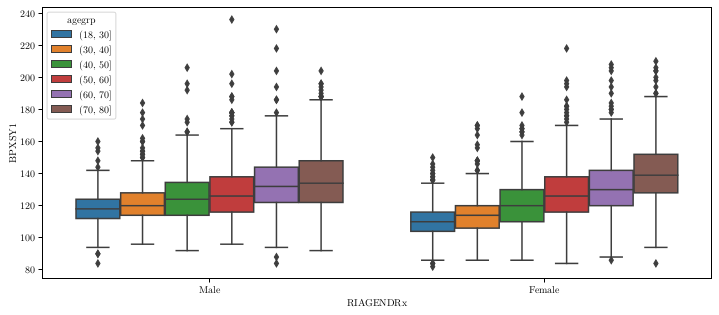

In [49]:
df["agegrp"] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y="BPXSY1", hue="agegrp", data=df)
plt.savefig('test.pgf')